# Python для анализа данных

*Алла Тамбовцева, НИУ ВШЭ*

## Web-scraping

Мы уже немного познакомились со структурой html-файлов, теперь попробуем выгрузить информацию из реальной страницы, а точнее, с реального сайта [nplus1.ru](https://nplus1.ru/).

**Наша задача:** выгрузить недавние новости в датафрейм `pandas`, чтобы потом сохранить все в csv-файл.

Сначала сгрузим весь html-код страницы и сохраним его в отдельную переменную. Для этого нам понадобится библиотека `requests`. Импортируем её:

In [1]:
import requests

Сохраним ссылку на главную страницу сайта в переменную `url` для удобства и выгрузим страницу. (Разумеется, это будет работать при подключении к интернету. Если соединение будет отключено, Python выдаст `NewConnectionError`).

In [2]:
url = 'https://nplus1.ru/' # сохраняем
page = requests.get(url) # загружаем страницу по ссылке

Если мы просто посмотрим на объект, мы ничего особенного не увидим:

In [3]:
page  # response 200 - страница загружена

<Response [200]>

In [4]:
# page.text

Импортируем функцию `BeautifulSoup` из библиотеки `bs4` (от *beautifulsoup4*) и заберём со страницы `page` код html в виде текста. 

In [4]:
from bs4 import BeautifulSoup  # не спрашивайте, почему BeautifulSoup

In [5]:
soup = BeautifulSoup(page.text, 'html')

Если выведем `soup` на экран, мы увидим то же самое, что в режиме разработчика или в режиме происмотра исходного кода (`view-source` через *Ctrl+U* в Google Chrome).

In [7]:
# soup

Для просмотра выглядит не очень удобно.  «Причешем» наш `soup` – воспользуемся методом `.prettify()` в сочетании с функцией `print()`.

In [8]:
# print(soup.prettify())

В такой выдаче ориентироваться гораздо удобнее (но при желании, то же можно увидеть в браузере, на большом экране).


Чтобы сгрузить все новости с главной страницы сайта, нужно собрать все ссылки на страницы с этими новостями. Ссылки в html-файле всегда заключены в тэг `<a></a>` и имеют атрибут `href`. Посмотрим на кусочки кода, соответствующие всем ссылкам на главной странице сайта:

False

Ссылок много. Но нам нужны только новости – ссылки, которые начинаются со слова `/news`. Добавим условие: будем выбирать только те ссылки, в которых есть `/news`. Создадим пустой список `urls` и будем добавлять в него только ссылки, которые удовлетворяют этому условию.

In [14]:
# urls = []

# for link in soup.find_all('a'):
#     if '/news' in link.get('href'):
#         urls.append('https://nplus1.ru'+link.get('href'))

urls = [link.get('href') 
        for link in soup.find_all('a') 
        if 'https://nplus1.ru/news/2023' in link.get('href')]

Ссылки, которые у нас есть в списке `urls`, относительные: они неполные, начало ссылки (название сайта) отсутствует. Давайте превратим их в абсолютные ‒ склеим с ссылкой https://nplus1.ru.

In [19]:
urls = list(set(urls))

In [26]:
# full_urls = []

# for u in urls:
#     res = 'https://nplus1.ru' + u
#     full_urls.append(res) 

# full_urls

In [15]:
# urls

Теперь наша задача сводится к следующему: изучить одну страницу с новостью, научиться из нее вытаскивать текст и всю необходимую информацию, а потом применить весь набор действий к каждой ссылке из `full_urls` в цикле. Посмотрим на новость с индексом 1, у вас может быть другая, новости обновляются.

In [20]:
url0 = urls[0]

page0 = requests.get(url0)
soup0 = BeautifulSoup(page0.text, 'html')

In [21]:
url0

'https://nplus1.ru/news/2023/10/16/neutral-atoms-new-level-fidelity'

В коде каждой страницы с новостью есть часть с мета-информацией: датой, именем автора и проч. Такая информация окружена тэгом `<meta></meta>`. Посмотрим:

In [22]:
soup0.find_all('meta')

[<meta charset="utf-8"/>,
 <meta content="width=device-width, initial-scale=1" name="viewport"/>,
 <meta content="#f26e40" name="msapplication-TileColor"/>,
 <meta content="#ffffff" name="theme-color"/>,
 <meta content="8c90b02c84ac3b72" name="yandex-verification"/>,
 <meta content="b419949322895fc9106e24ed01be58ac" name="pmail-verification"/>,
 <meta content="N + 1 — главное издание о науке, технике и технологиях" name="description"/>,
 <meta content="N + 1 — главное издание о науке, технике и технологиях" property="og:site_name"/>,
 <meta content="Квантовые вычислители на нейтральных атомах запутали и изменили три кубита за раз" property="og:title"/>,
 <meta content="https://minio.nplus1.ru/app-images/844852/652ced7c6b9ca_cover_share.jpg" property="og:image"/>,
 <meta content="https://nplus1.ru/news/2023/10/16/neutral-atoms-new-level-fidelity" property="og:url"/>,
 <meta content="N + 1 — главное издание о науке, технике и технологиях" property="og:description"/>,
 <meta content="arti

Из этого списка нам нужны части с именем автора, датой, заголовком и кратким описанием. Воспользуемся поиском по атрибуту `name`. Передадим функции `find_all()` в качестве аргумента словарь с названием и значением атрибута: 

In [23]:
soup0.find_all('meta', {'name' : 'author'}) # например, автор

[<meta content="Оксана Борзенкова" name="author"/>]

Теперь выберем единственный элемент полученного списка (с индексом 0):

In [24]:
soup0.find_all('meta', {'name' : 'author'})[0]

<meta content="Оксана Борзенкова" name="author"/>

Нам нужно вытащить из этого объекта `content` – имя автора. Посмотрим на атрибуты:

In [25]:
soup0.find_all('meta', {'name' : 'author'})[0].get('content')

'Оксана Борзенкова'

Как получить отсюда `content`? Очень просто, ведь это словарь! А доставать из словаря значение по ключу мы умеем.

In [26]:
author = soup0.find_all('meta', {'name' : 'author'})[0].attrs
author

{'name': 'author', 'content': 'Оксана Борзенкова'}

Аналогичным образом извлечем дату, заголовок и описание.

In [28]:
soup0.find_all('meta', {'property' : 'og:title'})[0].get('content')

'Квантовые вычислители на\xa0нейтральных атомах запутали и\xa0изменили три кубита за\xa0раз'

In [29]:
date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].get('content')
title = soup0.find_all('meta', {'property' : 'og:title'})[0].get('content')
description = soup0.find_all('h1', {'class':'text-34 md:text-42 xl:text-52 break-words'})[0].get_text().strip() \
+ '\n' + soup0.find_all('p', {'class':"text-36 md:text-44 xl:text-54 font-spectral text-main-gray mb-6"})[0].get_text().strip()



In [30]:
description

'Квантовые вычислители на\xa0нейтральных атомах запутали и\xa0изменили три кубита за\xa0раз\nА\xa0еще они теперь могут исправлять ошибки во\xa0время вычисления'

Осталось вытащить рубрики и сложность текста. Если мы посмотрим на исходный код страницы, мы увидим, что нужная нам информация находится в тэгах `<p></p>`:

In [32]:
soup0.find_all('div', {'class':"flex flex-wrap lg:mb-10 gap-2 text-tags xl:pr-9"})[0].find_all('span')

[<span class="relative before:block before:w-px before:bg-current before:h-4 before:absolute before:left-0 group pl-2 flex inline-flex items-center">
 <span class="group-hover:text-main transition-colors duration-75">18:42</span>
 </span>,
 <span class="group-hover:text-main transition-colors duration-75">18:42</span>,
 <span class="group-hover:text-main transition-colors duration-75">16.10.23</span>,
 <span class="group-hover:text-main transition-colors duration-75">8.3</span>,
 <span class="group-hover:text-main transition-colors duration-75">Физика</span>]

In [34]:
new_data = soup0.find_all('div', {'class':"flex flex-wrap lg:mb-10 gap-2 text-tags xl:pr-9"})[0].find_all('span')[1:]

time_published = new_data[0].get_text()
date_published = new_data[1].get_text()
complexity = new_data[2].get_text()
themes = ', '.join(i.get_text() for i in new_data[3:])

In [36]:
# soup0.find_all('p', {'class': 'mb-6'})

In [37]:
paragraphs = soup0.find_all('p', {'class': 'mb-6'})[1:]


In [38]:
links = set()
for p in paragraphs:
    links|={i.get('href') for i in p.find_all('a')}
links = ', '.join(links)

In [44]:
a = {1,3}
a|={1,2}

In [45]:
a

{1, 2, 3}

In [41]:
full_text = '\n'.join([p.get_text() for p in paragraphs])

In [46]:
full_text.replace('\xa0', ' ')

'Двум группам физиков на разных видах нейтральных атомов удалось добиться высокой точности одно-, двух- и даже трехкубитных операций, протестировать код коррекции ошибок и усовершенстовать свои предыдущие результаты в приготовлении запутанных состояний. Обе работы (1, 2) опубликованы в журнале Nature.\nПлатформы на нейтральных атомах и ионах приобретают все большую популярность в среде квантовых вычислений. Ученым уже удалось собрать симуляторы с сотнями атомов и реализовать на них алгоритмы.\nДля улучшения характеристик систем на нейтральных атомах физики предлагают и пробуют еще не использованные разновидности атомов или комбинируют их между собой. Кроме того, они стараются сделать структуры из атомов, которые будут удобными для коррекции ошибок — это второй важный шаг после сбора и проверки системы. Из-за высокой чувствительности к внешним воздействиям квантовые вычислители оказываются очень шумными для реализации сложных алгоритмов, поэтому без коррекции ошибок двигаться дальше в и

Не прошло и двух пар, как мы разобрались со всем :) Теперь осталось совсем чуть-чуть. Написать готовую функцию для всех проделанных нами действий и применить ее в цикле для всех ссылок в списке `full_urls`. Напишем! Аргументом функции будет ссылка на новость, а возвращать она будет текст новости и всю необходимую информацию (дата, автор, сложность и проч.). Скопируем все строки кода выше.

In [47]:
def GetNews(url0):
    """
    Returns a tuple with 
    url0, date_published, time_published, author, description, title, complexity, themes, links,full_text
    Parameters:
    
    url0 is a link to the news (string)
    """
    page0 = requests.get(url0)
    soup0 = BeautifulSoup(page0.text, 'lxml')
    
    author = soup0.find_all('meta', {'name' : 'author'})[0].get('content')
    date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].get('content')
    title = soup0.find_all('meta', {'property' : 'og:title'})[0].get('content')
    description = soup0.find_all('h1', {'class':'text-34 md:text-42 xl:text-52 break-words'})[0].get_text().strip() \
+ '\n' + soup0.find_all('p', {'class':"text-36 md:text-44 xl:text-54 font-spectral text-main-gray mb-6"})[0].get_text().strip()


    
    new_data = soup0.find_all('div', {'class':"flex flex-wrap lg:mb-10 gap-2 text-tags xl:pr-9"})[0].find_all('span')[1:]

    time_published = new_data[0].get_text()
    date_published = new_data[1].get_text()
    complexity = new_data[2].get_text()
    themes = ', '.join(i.get_text() for i in new_data[3:])
    
    paragraphs = soup0.find_all('p', {'class': 'mb-6'})[1:]
    links = set()
    for p in paragraphs:
        links|={i.get('href') for i in p.find_all('a')}
    links -= {None} # Если вдруг у нас есть None-ссылка
    links = {''} if not links else links
    links = ', '.join(links)
    full_text = '\n'.join([p.get_text() for p in paragraphs]).replace('\xa0', ' ')
    
    return url0, date_published, time_published, author, description, title, complexity, themes, links,full_text

Уфф. Осталось применить ее в цикле. Но давайте не будем спешить: импортируем функцию `sleep` для задержки, чтобы на каждой итерации цикла, прежде чем перейти к следующей новости, Python ждал несколько секунд. Во-первых, это нужно, чтобы сайт «не понял», чтобы мы его грабим, да еще автоматически. Во-вторых, с небольшой задержкой всегда есть гарантия, что страница прогрузится (сейчас это пока не очень важно, но особенно актуально будет, когда будем обсуждать встраивание в браузер с Selenium). Приступим.

In [50]:
len(set(urls))

46

In [66]:
from time import sleep
from tqdm import tqdm

In [51]:
import random

In [64]:
random.random()*2

1.2204338385057976

In [67]:
news = [] # это будет список из кортежей, в которых будут храниться данные по каждой новости

for link in tqdm(urls):
    res = GetNews(link)
    news.append(res)
    sleep(random.random()) # задержка в 3 секунды

100%|██████████| 46/46 [00:42<00:00,  1.09it/s]


In [68]:
news[5]

('https://nplus1.ru/news/2023/10/17/older-siblings-and-risk-of-spondylitis',
 '17.10.23',
 '01:30',
 'Слава Гоменюк',
 'Удаление миндалин и\xa0наличие старших братьев или сестер повысило риск развития болезни Бехтерева\nТакже риск повысили детские инфекции',
 'Удаление миндалин и\xa0наличие старших братьев или сестер повысило риск развития болезни Бехтерева',
 '2.9',
 'Медицина',
 'https://nplus1.ru/news/2023/09/12/immune-mediated-inflammatory-diseases, https://doi.org/10.1136/rmdopen-2023-003438, https://pubmed.ncbi.nlm.nih.gov/31687771/',
 'Выборка из более чем 27 тысяч человек показала, что наличие старших братьев и сестер на 12 процентов повышает риск развития анкилозирующего спондилоартрита — болезни Бехтерева. Помимо этого, как сообщается в журнале RMD Open, перенесенное в детстве удаление миндалин также повышает риск развития болезни — в среднем на 30 процентов, а тяжелые инфекции в детстве — на 13 процентов.\nПри анкилозирующем спондилоартрите, или болезни Бехтерева, возникает 

In [20]:
page0 = requests.get(urls[60])
soup0 = BeautifulSoup(page0.text, 'lxml')

In [22]:
paragraphs = soup0.find_all('p', {'class': 'mb-6'})[1:]

In [24]:
links = set()
for p in paragraphs:
    links|={i.get('href') for i in p.find_all('a')}

In [26]:
links - {None}

{'https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.130.106401',
 'https://nplus1.ru/material/2017/07/28/protonpuzzle',
 'https://nplus1.ru/news/2017/01/12/relativistic-gold',
 'https://nplus1.ru/news/2017/10/13/chem-machine',
 'https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%BE%D0%BD%D0%B0%D0%BB%D0%B0_%D0%BF%D0%BB%D0%BE%D1%82%D0%BD%D0%BE%D1%81%D1%82%D0%B8',
 'https://ru.wikipedia.org/wiki/%D0%A3%D1%80%D0%B0%D0%B2%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_%D0%A8%D1%80%D1%91%D0%B4%D0%B8%D0%BD%D0%B3%D0%B5%D1%80%D0%B0#%D0%A1%D1%82%D0%B0%D1%86%D0%B8%D0%BE%D0%BD%D0%B0%D1%80%D0%BD%D0%BE%D0%B5_%D1%83%D1%80%D0%B0%D0%B2%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_%D0%A8%D1%80%D1%91%D0%B4%D0%B8%D0%BD%D0%B3%D0%B5%D1%80%D0%B0'}

Так теперь выглядит первый элемент списка:

In [39]:
news[0]

('https://nplus1.ru/news/2023/03/31/Chondrostereum-purpureum',
 '31.03.23',
 '16:15',
 'Слава Гоменюк',
 'Грибковый паразит растений впервые заразил человека\nПациент долгое время работал с гнилой древесиной',
 'Грибковый паразит растений впервые заразил человека',
 '2.9',
 'Медицина',
 'https://doi.org/10.1016/j.mmcr.2023.03.001, https://doi.org/10.1111/1462-2920.15028, https://nplus1.ru/news/2022/11/17/quicksilver-rush, https://nplus1.ru/news/2023/03/21/2019-to-2021-candida-auris',
 'В Индии миколог, который занимался исследованием растительных патогенов в мертвых деревьях, впервые в истории заразился паразитирующим на деревьях грибком Chondrostereum purpureum — хондростереумом пурпурным. У пациента не было нарушений иммунитета, в том числе ВИЧ-инфекции и диабета, и он не принимал иммуносупрессоры. Отчет о случае опубликован в журнале Medical Mycology Case Reports.\nОбычно Chondrostereum purpureum паразитирует на живых деревьях, вызывая «млечный блеск» — заболевание, при котором гриб

Импортируем `pandas` и создадим датафрейм из списка кортежей: 

In [69]:
import pandas as pd

In [70]:
df = pd.DataFrame(news)

In [71]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9
0,https://nplus1.ru/news/2023/10/16/neutral-atom...,16.10.23,18:42,Оксана Борзенкова,Квантовые вычислители на нейтральных атомах за...,Квантовые вычислители на нейтральных атомах за...,8.3,Физика,https://www.nature.com/articles/s41586-023-064...,Двум группам физиков на разных видах нейтральн...
1,https://nplus1.ru/news/2023/10/04/sulfur-of-de...,04.10.23,21:00,Винера Андреева,Извержения Деканских траппов принесли динозавр...,Извержения Деканских траппов принесли динозавр...,5.6,"Геология, Экология и климат",https://www.sciencedirect.com/science/article/...,"Геохимики обнаружили в деканских лавах, залега..."


Переименуем столбцы в базе.

In [72]:
df.columns = ['url', 'date_published', 'time_published', 'author', 'description', 'title', 'complexity', 'themes', 'links','full_text']

In [74]:
df.to_excel('parsed_news.xlsx')

Теперь внесем изменения: сделаем столбец `diffc` числовым – типа *float*.

In [44]:
df['complexity'] = df['complexity'].apply(float)

Теперь сложность представлена в базе как количественный показатель, и описывать ее можно соответствующим образом:

In [45]:
df.complexity.describe()

count    71.000000
mean      4.549296
std       2.397193
min       1.100000
25%       2.850000
50%       3.700000
75%       6.550000
max       9.500000
Name: complexity, dtype: float64

In [77]:
from matplotlib.cbook import flatten

In [85]:
[i.split(', ') for i in df.themes.unique()]

[['Физика'],
 ['Геология', 'Экология и климат'],
 ['Астрономия'],
 ['Медицина', 'Биология', 'Зоология'],
 ['Медицина'],
 ['Антропология', 'Археология'],
 ['Археология', 'Антропология'],
 ['Роботы и дроны', 'Медицина', 'Технологии'],
 ['Роботы и дроны', 'Технологии'],
 ['Антропология', 'Химия'],
 ['Психология'],
 ['Экология и климат', 'Зоология'],
 ['Химия'],
 ['Медицина', 'Медицина'],
 ['Археология', 'История'],
 ['Медицина', 'Археология'],
 ['Авиация', 'Транспорт', 'Технологии'],
 ['Астрономия', 'Геология'],
 ['Археология'],
 ['Биология', 'Технологии'],
 ['Зоология'],
 ['Экология и климат', 'Медицина', 'Химия'],
 ['Археология', 'Зоология'],
 ['Экология и климат'],
 ['Антропология'],
 ['Космонавтика'],
 ['Геология'],
 ['Биология'],
 ['Физика', 'Математика'],
 ['Медицина', 'Социология']]

In [86]:
len(set(flatten([i.split(', ') for i in df.themes.unique()])))

['Авиация',
 'Антропология',
 'Археология',
 'Астрономия',
 'Биология',
 'Геология',
 'Зоология',
 'История',
 'Космонавтика',
 'Математика',
 'Медицина',
 'Психология',
 'Роботы и дроны',
 'Социология',
 'Технологии',
 'Транспорт',
 'Физика',
 'Химия',
 'Экология и климат']

In [72]:
df[df.themes.apply(lambda x: 'зоология' in x.lower())].sample(1).full_text.values[0]

'Палеогенетики подтвердили, что первые домашние лошади у коренных общин центральных районов Великих равнин и северных районов Скалистых гор происходили от особей, завезенных в Америку испанцами. Более того, ученые нашли останки животных свидетельствующих в пользу того, что в этом регионе овладели навыками обращения с домашними лошадьми до восстания пуэбло, произошедшего в 1680 году. Обычно именно с этим событием связывают распространение коневодства среди коренных американцев, живших на территории современных США. Об этом сообщается в статье, опубликованной в журнале Science.\nСогласно современным представлениям лошади (Equus) как отдельный род появились в Северной Америке между 4,5 и 4 миллионами лет назад, откуда по сухопутному мосту около 2,5 миллиона лет (по другим данным – около 0,9–0,8 миллиона лет назад) назад они переселились в Евразию. Вместе с тем в самой Америке уже в эпоху голоцена лошади вымерли – судя по ДНК, недавно извлеченной из образцов канадского грунта, это произошл

In [52]:
df.to_csv('news_plus_1.csv', 
          index = False, 
          sep = ';',  #  Сюда можно поставить произвольный символ, чтоб новость не ломать
          encoding = 'utf-8-sig')

Теперь столбец со сложностью точно числовой. Можем даже построить для него гистограмму.

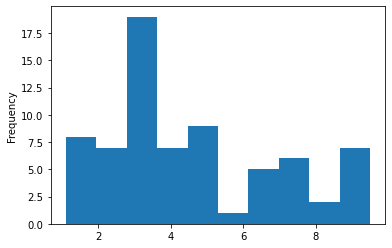

In [46]:
%matplotlib inline
df.complexity.plot.hist()

Объединим рубрики в *text* в одну строку через запятую:

In [37]:
df['rubric'] = [','.join(r) for r in df.rubric]

Давайте почистим текст новостей – уберем оттуда текст, не относящийся к новостям. Найдем лишнее:

In [ ]:
df.text[0]

Лишний текст находится после фразы 'Нашли опечатку?'. Так давайте будем разбивать строки по этой фразе с помощью метода `.split()` и брать все, что до нее (элемент с индексом 0).

In [38]:
df['clean_text'] = [t.split('Нашли опечатку?')[0] for t in df.text]

Осталось только заменить непонятные символы `\xa0` на пробелы:

In [39]:
df['clean_text'] = [t.replace("\xa0", " ") for t in df.clean_text]

In [40]:
df.clean_text[0]

'Российский военно-транспортный самолет Ил-112В совершил первый полет, сообщает Авиационный комплекс имени Ильюшина. Испытания прошли на аэродроме воронежского авиазавода ПАО «ВАСО», командиром экипажа был шеф-пилот ПАО «Ил» Герой России Николай Куимов. Первый полет стал завершением цикла аэродромной отработки, в ходе которой были проведены испытания всех систем, в том числе пробежки по аэродрому. Полет прошел в штатном режиме. В воздухе Ил-112В сопровождал самолет-лаборатория Ил-114ЛЛ. Ил-112В в перспективе должен заменить легкий транспортник Ан-26. Он будет использоваться для перевозки и десантирования легкой техники, грузов и бойцов, его грузоподъемность — около пяти тонн. Самолет сможет развивать скорость до 550 километров в час и совершать полеты на расстояние до 3,4 тысячи километров, а при взлете с грунтовых аэродромов и максимальной загрузкой — до 1,2 тысячи километров. Транспортник сможет взлетать с взлетно-посадочных полос длиной не более 900 метров. Пробег Ил-112В при посадк

Всё! Сохраняем датафрейм в файл. Для разнообразия сохраним в Excel:

In [41]:
df.to_excel('nplus-news.xlsx')